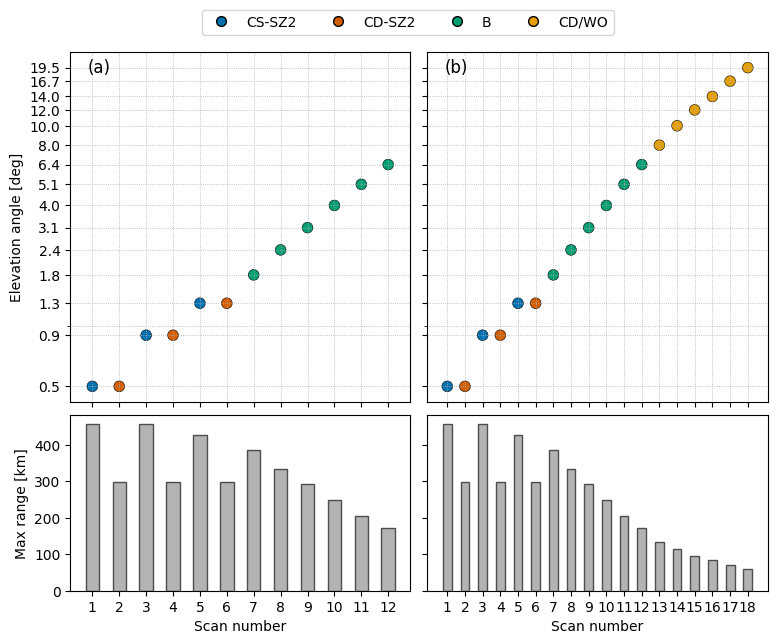

In [11]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# --------------------------------------------------
# Real VCP values with gate counts (1 gate = 0.25 km)
# --------------------------------------------------

vcp35_elev = [0.5, 0.5, 0.9, 0.9, 1.3, 1.3, 1.8, 2.4, 3.1, 4.0, 5.1, 6.4]
vcp35_gates = [1832, 1192, 1832, 1192, 1712, 1192, 1540, 1336, 1168, 992, 824, 684]
vcp35_tech = [
    "CS-SZ2",
    "CD-SZ2",
    "CS-SZ2",
    "CD-SZ2",
    "CS-SZ2",
    "CD-SZ2",
    "B",
    "B",
    "B",
    "B",
    "B",
    "B",
]

vcp215_elev = [
    0.5,
    0.5,
    0.9,
    0.9,
    1.3,
    1.3,
    1.8,
    2.4,
    3.1,
    4.0,
    5.1,
    6.4,
    8.0,
    10.0,
    12.0,
    14.0,
    16.7,
    19.5,
]
vcp215_gates = [
    1832,
    1192,
    1832,
    1192,
    1712,
    1192,
    1540,
    1336,
    1168,
    992,
    824,
    684,
    540,
    456,
    384,
    332,
    280,
    240,
]
vcp215_tech = [
    "CS-SZ2",
    "CD-SZ2",
    "CS-SZ2",
    "CD-SZ2",
    "CS-SZ2",
    "CD-SZ2",
    "B",
    "B",
    "B",
    "B",
    "B",
    "B",
    "CD/WO",
    "CD/WO",
    "CD/WO",
    "CD/WO",
    "CD/WO",
    "CD/WO",
]


def gates_to_range_km(gates):
    return np.array(gates) * 0.25


vcp35_range = gates_to_range_km(vcp35_gates)
vcp215_range = gates_to_range_km(vcp215_gates)

# ✅ Colorblind-friendly palette
tech_colors = {
    "CS-SZ2": "#0072B2",  # Blue
    "CD-SZ2": "#D55E00",  # Vermillion
    "B": "#009E73",  # Bluish green
    "CD/WO": "#E69F00",  # Orange
}


def make_vcp_data(elevs, ranges, techs):
    scans = np.arange(1, len(elevs) + 1)
    return scans, np.array(elevs), np.array(ranges), np.array(techs)


vcp35_data = make_vcp_data(vcp35_elev, vcp35_range, vcp35_tech)
vcp215_data = make_vcp_data(vcp215_elev, vcp215_range, vcp215_tech)

# --------------------------------------------------
# Plotting using GridSpec with shared axes
# --------------------------------------------------

fig = plt.figure(figsize=(9, 7))
gs = gridspec.GridSpec(2, 2, height_ratios=[2.0, 1], hspace=0.05, wspace=0.05)

axs = np.empty((2, 2), dtype=object)
axs[0, 0] = fig.add_subplot(gs[0, 0])
axs[0, 1] = fig.add_subplot(gs[0, 1], sharey=axs[0, 0])
axs[1, 0] = fig.add_subplot(gs[1, 0], sharex=axs[0, 0])
axs[1, 1] = fig.add_subplot(gs[1, 1], sharex=axs[0, 1], sharey=axs[1, 0])


def plot_vcp(col, scans, elev, rng, tech, title):
    ax_elev = axs[0, col]
    ax_rng = axs[1, col]
    colors = [tech_colors[t] for t in tech]

    # Top plot: elevation (symlog)
    ax_elev.scatter(scans, elev, c=colors, s=60, edgecolor="k", linewidth=0.4)
    ax_elev.set_yscale("symlog", linthresh=0.3)
    # ax_elev.set_title(title)
    ax_elev.grid(True, which="both", linestyle=":", linewidth=0.6)

    all_elevs = sorted(set(vcp35_elev + vcp215_elev))
    ax_elev.set_yticks(all_elevs)
    ax_elev.set_yticklabels([f"{v:.1f}" for v in all_elevs])

    ax_elev.tick_params(axis="x", labelbottom=False)

    # Bottom plot: range bars
    ax_rng.bar(scans, rng, color="0.7", edgecolor="0.3", width=0.5)
    ax_rng.set_xlabel("Scan number")
    ax_rng.set_xticks(scans)

    if col == 0:
        ax_elev.set_ylabel("Elevation angle [deg]")
        ax_rng.set_ylabel("Max range [km]")
    else:
        ax_elev.set_ylabel("")
        ax_elev.tick_params(axis="y", labelleft=False)
        ax_rng.set_ylabel("")
        ax_rng.tick_params(axis="y", labelleft=False)


# Plot both VCPs
plot_vcp(0, *vcp35_data, "VCP-35 (Clear-air)")
plot_vcp(1, *vcp215_data, "VCP-215 (Precipitation)")

# Add (a) and (b) labels to top-left corners of upper subplots
panel_labels = ["(a)", "(b)"]
for i, label in enumerate(panel_labels):
    axs[0, i].text(
        0.05,
        0.98,
        label,
        transform=axs[0, i].transAxes,
        fontsize=12,
        va="top",
        ha="left",
    )

# Legend
legend_handles = [
    Line2D(
        [],
        [],
        marker="o",
        linestyle="None",
        color=color,
        label=tech,
        markeredgecolor="k",
        markersize=7,
    )
    for tech, color in tech_colors.items()
]


fig.legend(
    handles=legend_handles,
    loc="upper center",
    ncol=len(tech_colors),
    bbox_to_anchor=(0.5, 0.95),
)
plt.savefig("VCP-scan.png", dpi=150, bbox_inches="tight")
plt.show()